In [1]:
import hdcms as hdc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image

In [2]:
# the data for ex[i].txt (maybe convert to reading in from numpy)
a = np.array([0.19274193548387097,   0.14073226544622425,
0.6556451612903226,   0.34439359267734554,
1.1451612903225807,   0.18707093821510298,
0.15483870967741936,   0.18020594965675057,
0.6645161290322581,   0.36784897025171626,
1.15,   0.17963386727688788,
0.11290322580645161,   0.10469107551487414,
0.6588709677419354,   0.33752860411899316,
1.1516129032258065,   0.17734553775743708,
0.28951612903225804,   0.06807780320366133,
0.6645161290322581,   0.3197940503432494,
1.153225806451613,   0.17963386727688788,
0.31209677419354837,   0.16018306636155608,
0.6725806451612903,   0.3329519450800915,
1.1556451612903227,   0.17162471395881007,
0.07580645161290323,   0.15846681922196795,
0.6612903225806451,   0.29576659038901604,
1.1556451612903227,   0.17963386727688788,
0.0846774193548387,   0.04004576659038902,
0.6645161290322581,   0.32151029748283755,
1.1596774193548387,   0.17848970251716248]).reshape(-1, 2)
# the colors for 
colors = ['red', 'green', 'blue', 
          'red', 'green', 'blue', 
          'red', 'green', 'blue', 
          'red', 'green', 'blue', 
          'red', 'green', 'blue', 
          'red', 'green', 'blue', 
          'red', 'green', 'blue']

In [3]:
sum_stat_2d = hdc.regex2stats2d(r"ex[0-9]+.txt", dir="./data/")
sum_stat_1d = hdc.regex2stats1d(r"ex[0-9]+.txt", dir="./data/")
print(sum_stat_2d)

[[0.66313364 1.         0.00536385 0.        ]
 [1.15299539 0.54237722 0.00467265 0.03806089]
 [0.17465438 0.36614526 0.09529203 0.15497286]]


In [4]:
image_config = hdc.visualize.ImageConfig(size=(3600, 1200), std_scale=1, desingularization=1e-5, axis_thickness=3, xlabel="x values", ylabel="y values")
stats_context = hdc.visualize.StatsContext(start=0, stop=899.9, num_bins=9000)

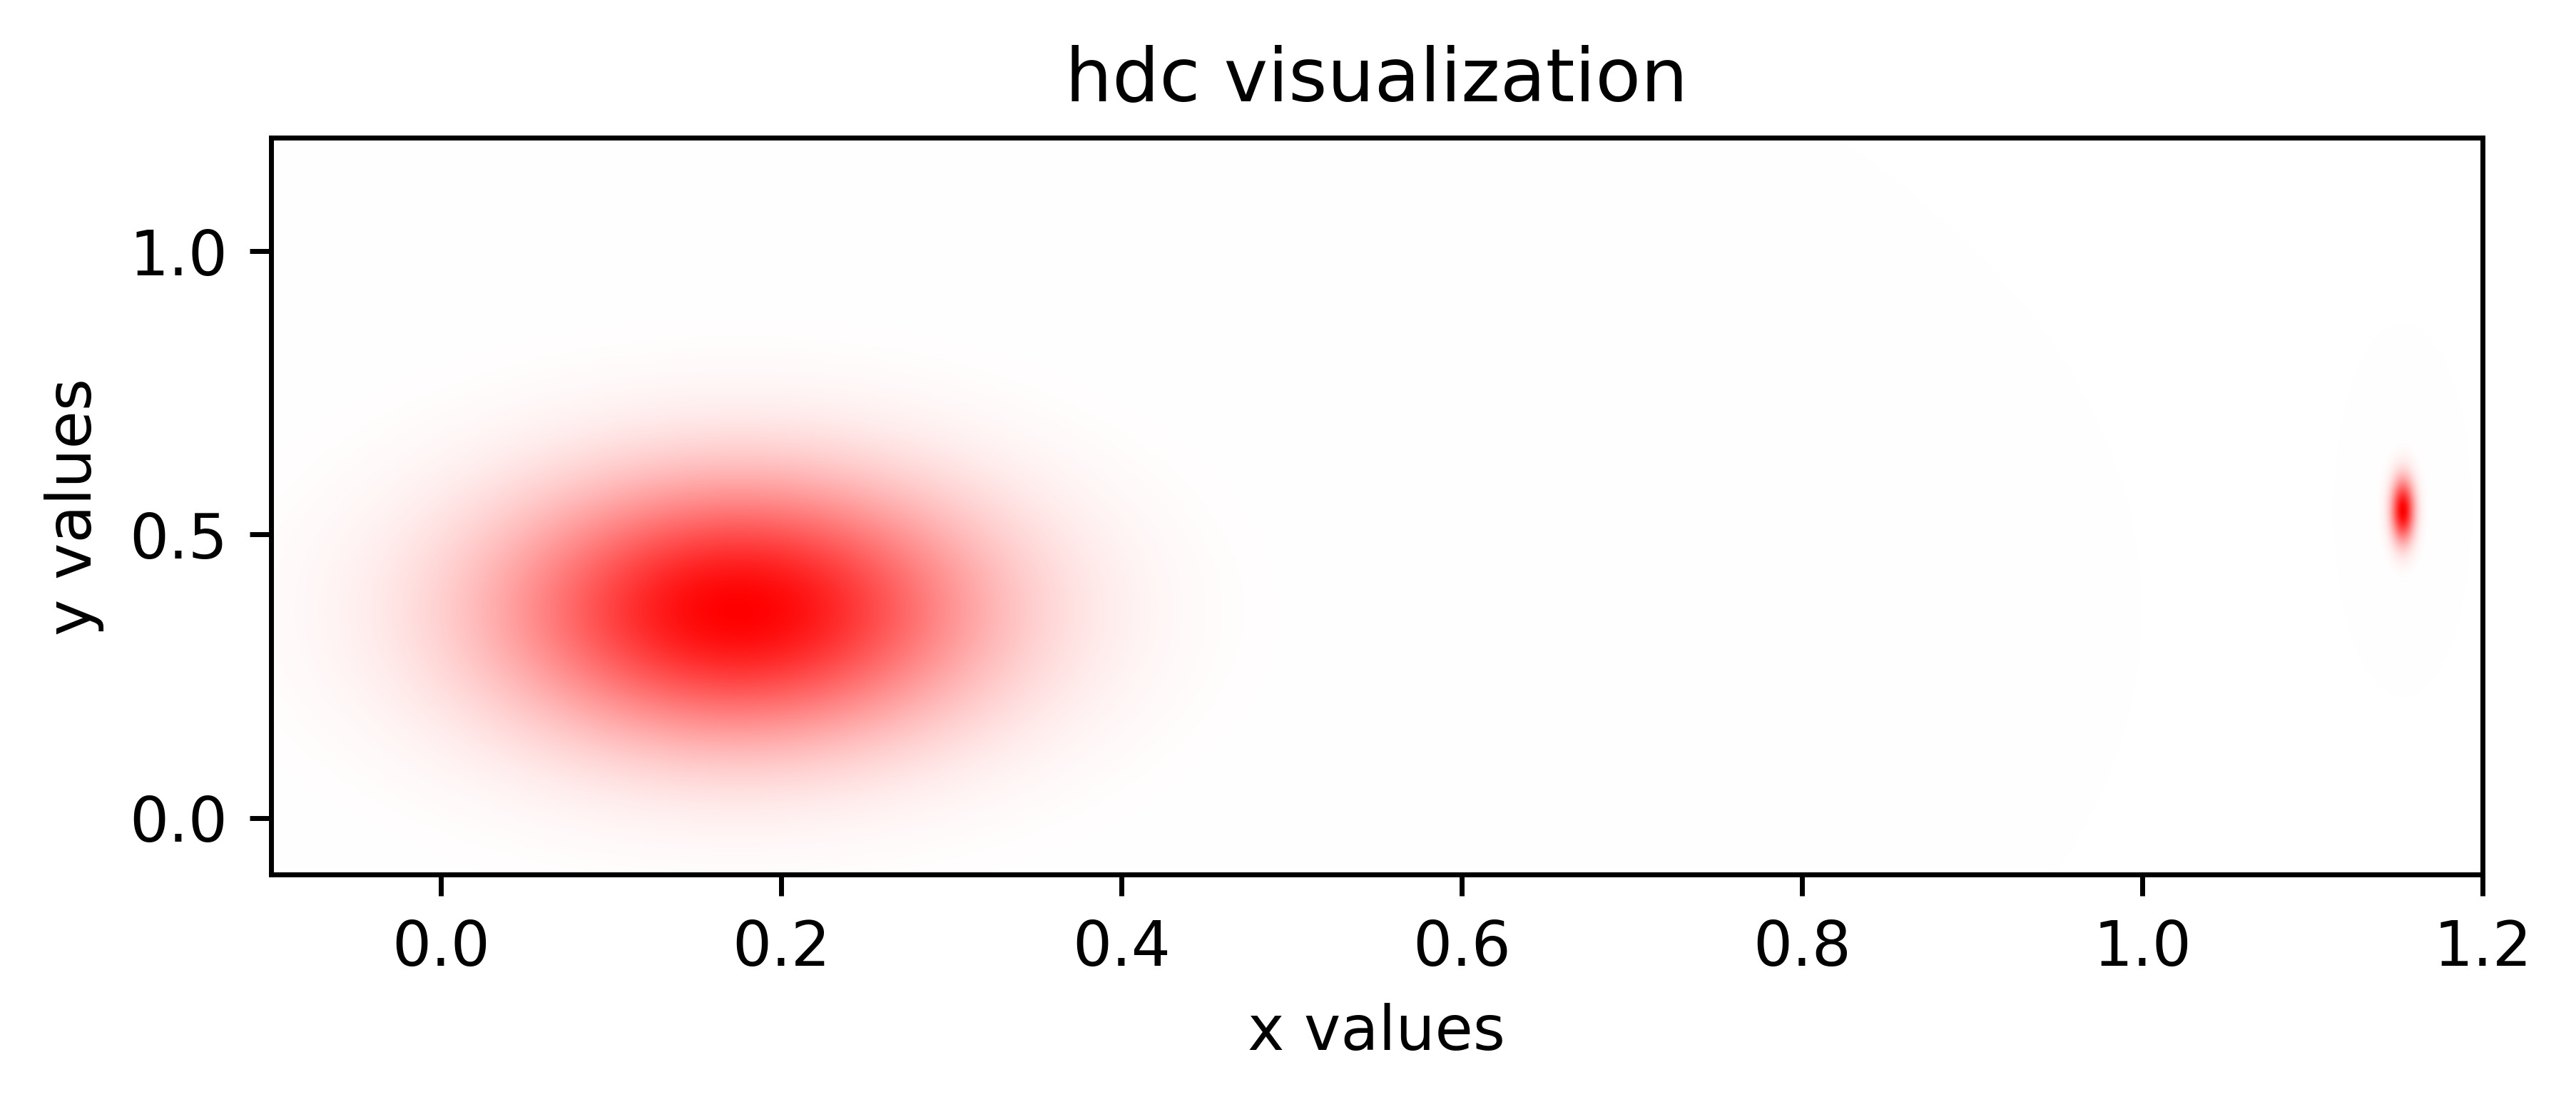

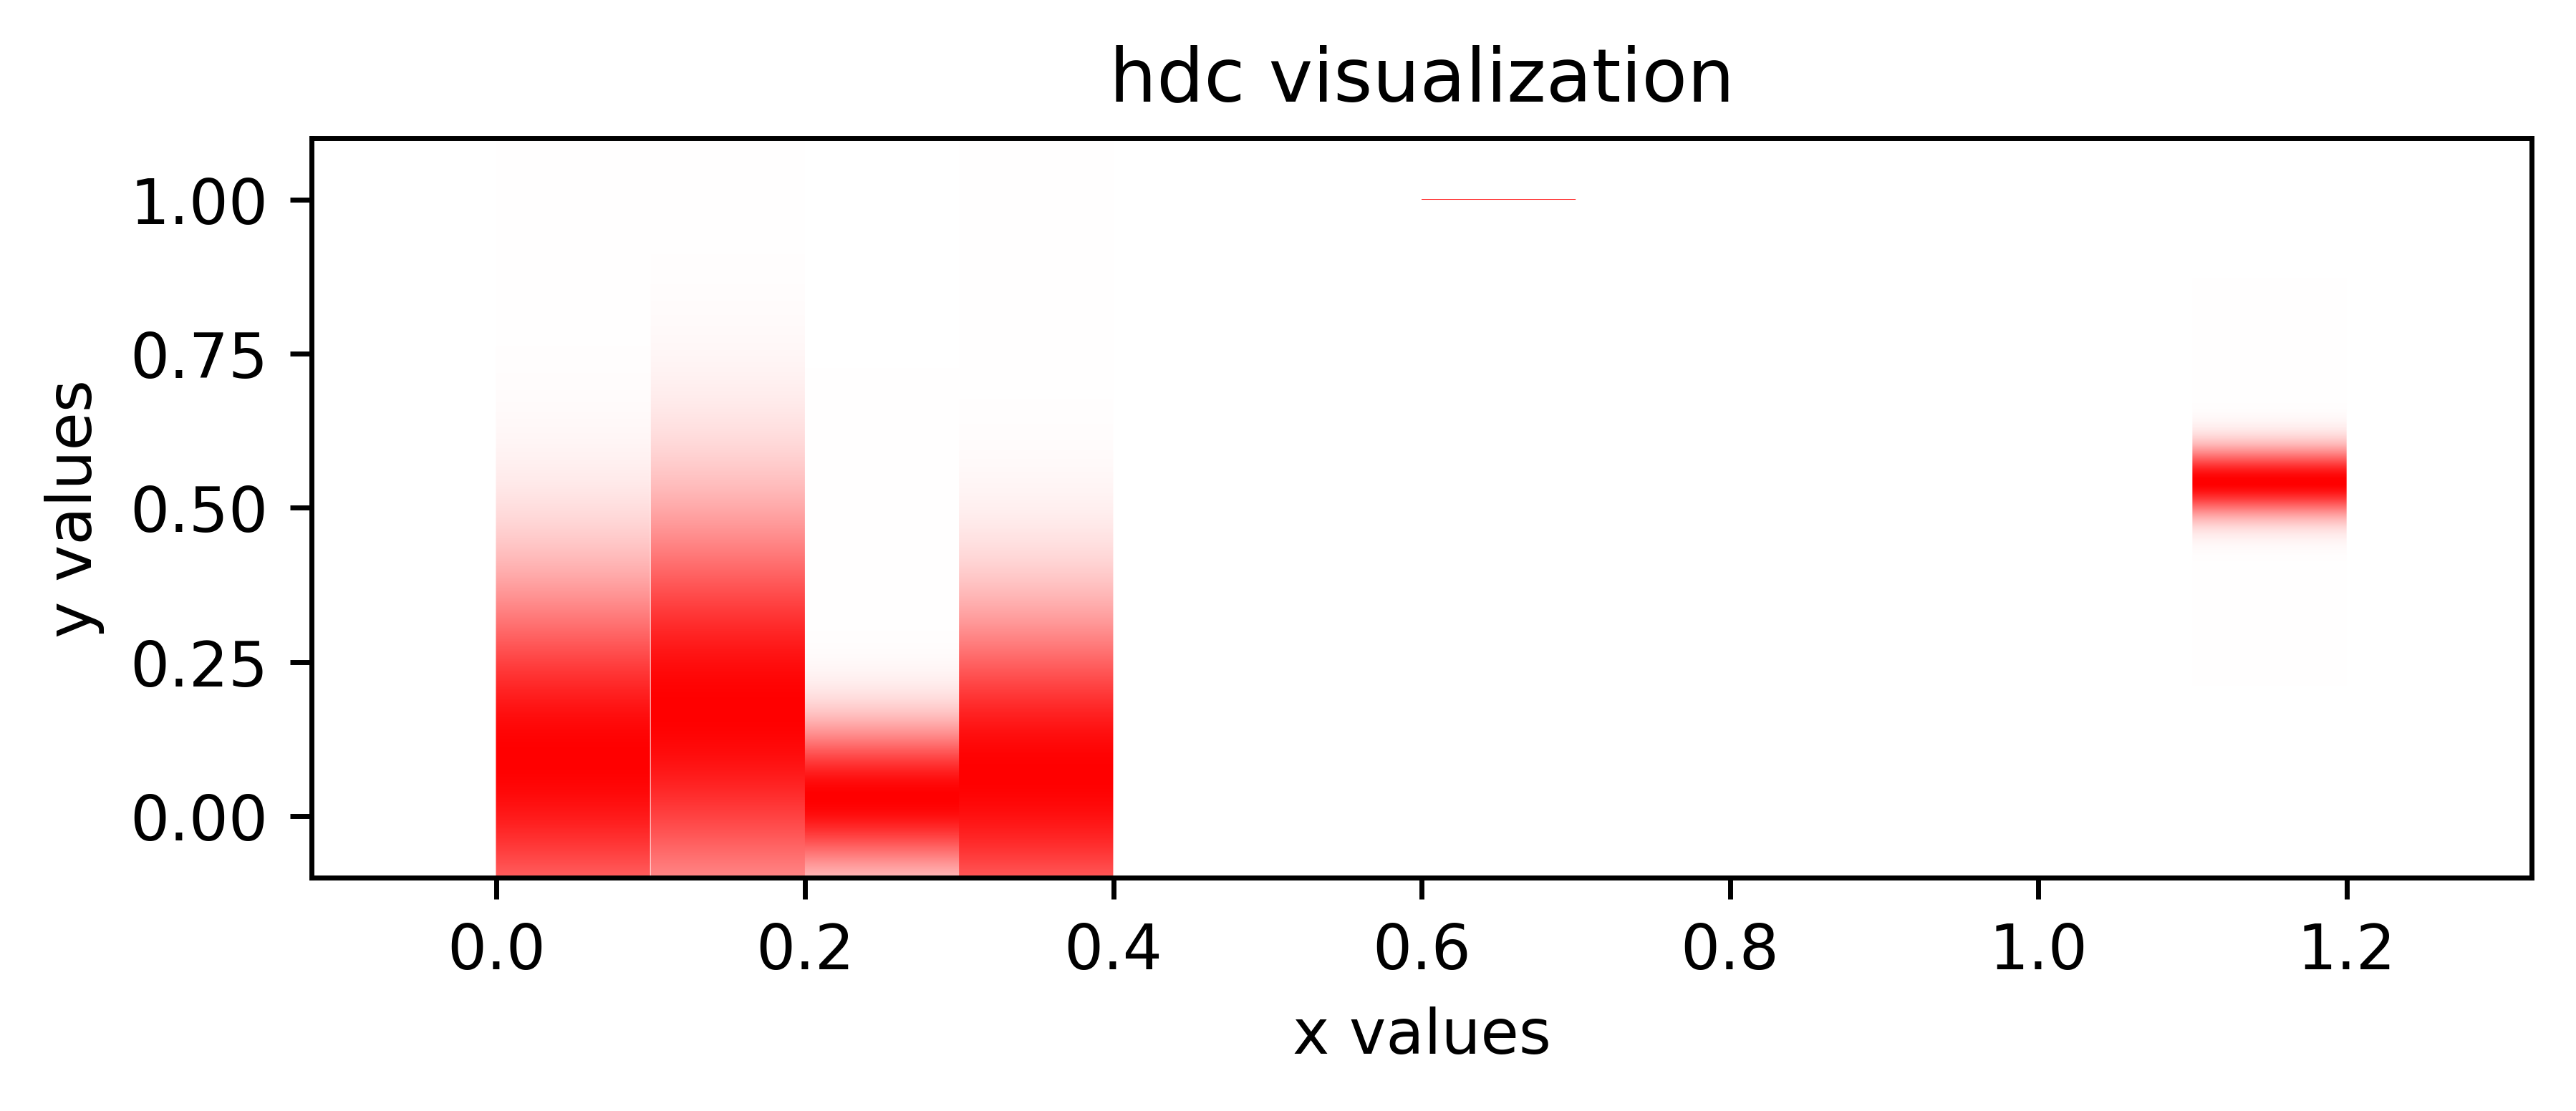

<Figure size 640x480 with 0 Axes>

In [5]:
# axis = (min_x, min_y, max_x, max_y)
twod_axis = (-0.1, -0.1, 1.2, 1.2)
im = hdc.write_image(sum_stat_2d, config=image_config, context=stats_context, axis_limits=twod_axis)
im.save("/tmp/output2.png")

oned_axis = (-0.12, -0.1, 1.32, 1.1)
im2 = hdc.write_image(sum_stat_1d, config=image_config, context=stats_context, axis_limits=oned_axis)
im2.save("/tmp/output1.png")

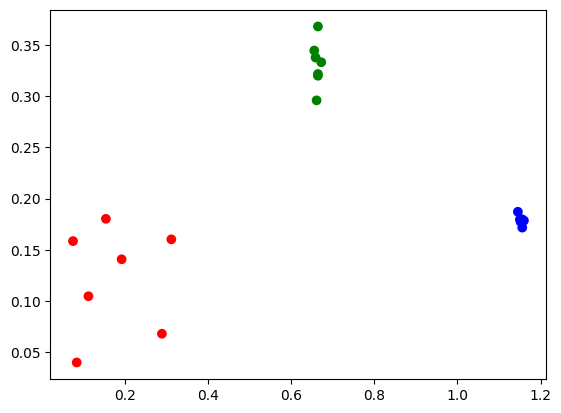

In [6]:
plt.scatter(x=a[:,0], y=a[:,1], c=colors)
plt.show()

# Random stuff

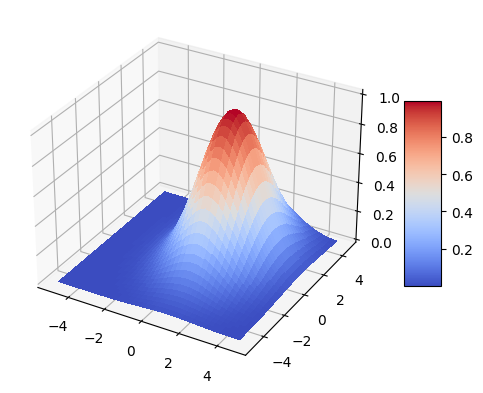

In [7]:
x = np.arange(-5, 5, .25)
y = np.arange(-5, 5, .25)
xv, yv = np.meshgrid(x, y)
r = ((xv-1)/2)**2 + ((yv-1)/3)**2
z = np.exp(-r)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xv, yv, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 1.01)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("/tmp/3dgaussian.png")